Área Saúde


In [11]:
import pandas as pd

file_path = '/content/depression_data.csv'


df = pd.read_csv(file_path)


df.head()


,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [14]:
# Verifique todas as variáveis definidas no ambiente
print(locals())



{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', "from sklearn.cluster import DBSCAN\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n\ndbscan = DBSCAN(eps=3, min_samples=2)\ndf_clustered = df.copy()\nX = df_clustered.drop('History of Mental Illness', axis=1)  # Remover a coluna target\n\n\ndbscan.fit(X)\n\n\ndf_clustered['Cluster'] = dbscan.labels_\n\n\nplt.figure(figsize=(10, 6))\nsns.scatterplot(x=df_clustered['Age'], y=df_clustered['Income'], hue=df_clustered['Cluster'], palette='viridis', legend='full')\nplt.title('Clusters com DBSCAN')\nplt.xlabel('Idade')\nplt.ylabel('Renda')\nplt.show()", "from sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score, classificatio

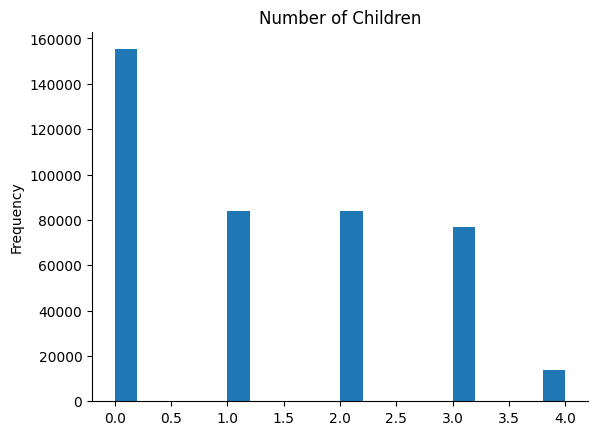

In [20]:
from matplotlib import pyplot as plt

# Certifique-se de que df está carregado corretamente
df['Number of Children'].plot(kind='hist', bins=20, title='Number of Children')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()



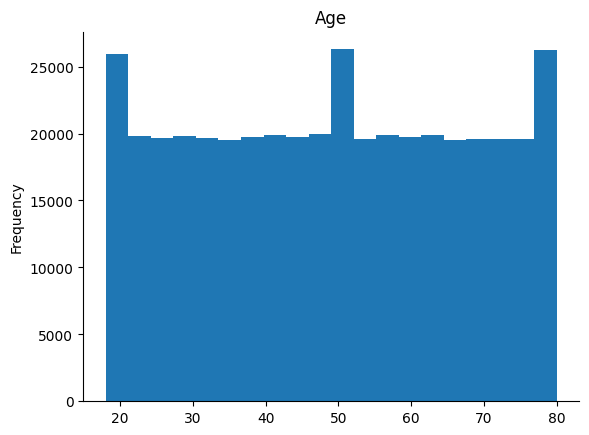

In [23]:
from matplotlib import pyplot as plt


df['Age'].plot(kind='hist', bins=20, title='Age')


plt.gca().spines[['top', 'right']].set_visible(False)


plt.show()



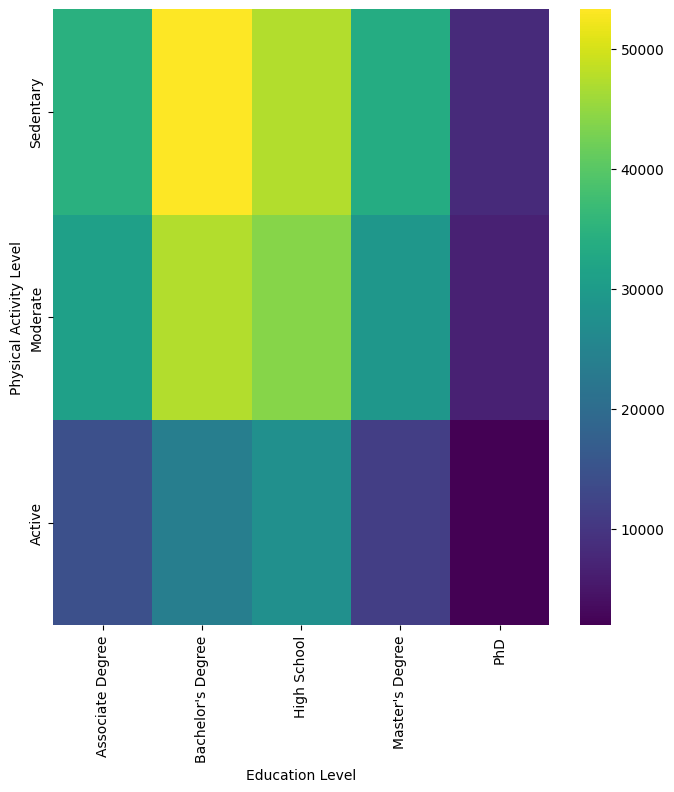

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

plt.subplots(figsize=(8, 8))


df_2dhist = pd.DataFrame({
    x_label: grp['Physical Activity Level'].value_counts()
    for x_label, grp in df.groupby('Education Level')
})

sns.heatmap(df_2dhist, cmap='viridis')


plt.xlabel('Education Level')
_ = plt.ylabel('Physical Activity Level')


plt.show()


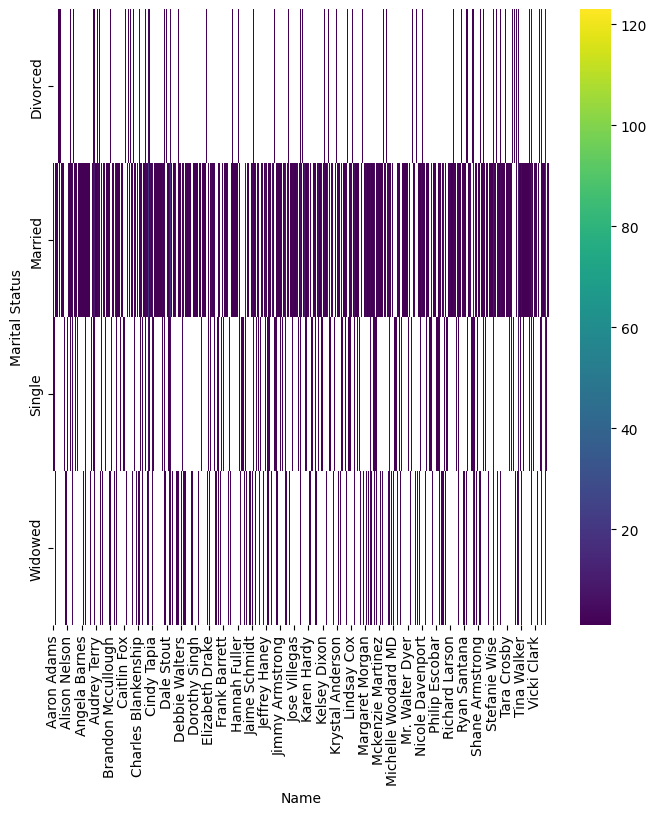

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

plt.subplots(figsize=(8, 8))


df_2dhist = pd.DataFrame({
    x_label: grp['Marital Status'].value_counts()
    for x_label, grp in df.groupby('Name')
})


sns.heatmap(df_2dhist, cmap='viridis')


plt.xlabel('Name')
_ = plt.ylabel('Marital Status')


plt.show()


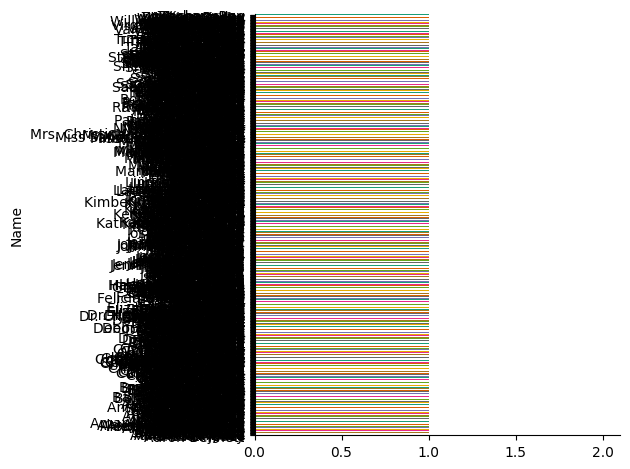

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

df_sample = df.sample(n=1000, random_state=42)


ax = df_sample.groupby('Name').size().plot(kind='barh', color=sns.color_palette('Dark2'))


plt.gca().spines[['top', 'right']].set_visible(False)


plt.tight_layout()


plt.show()



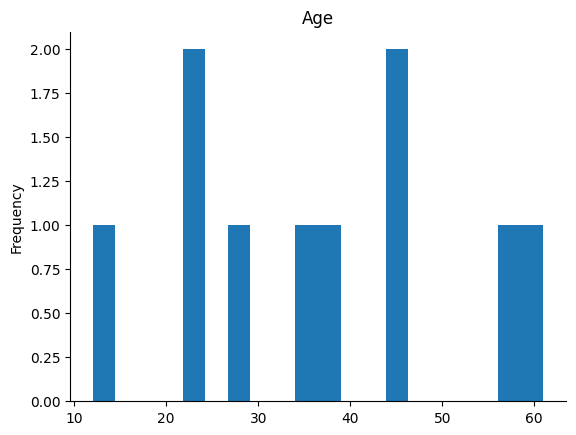

In [37]:
import pandas as pd


data = {'Age': [23, 45, 12, 36, 58, 45, 23, 37, 29, 61]}
df_0 = pd.DataFrame(data)


df_0['Age'].plot(kind='hist', bins=20, title='Age')


plt.gca().spines[['top', 'right']].set_visible(False)


plt.show()



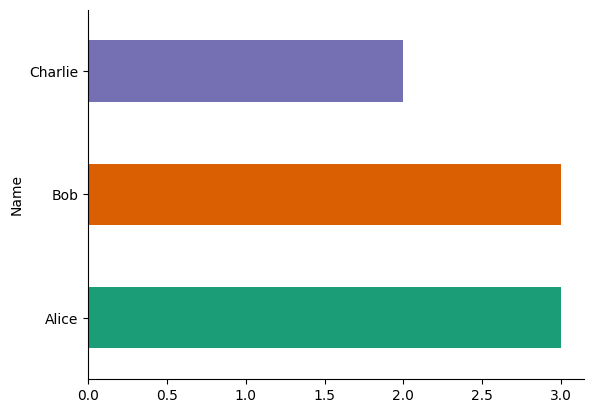

In [39]:
import pandas as pd


data = {'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob', 'Alice', 'Charlie', 'Bob']}
_df_3 = pd.DataFrame(data)

import matplotlib.pyplot as plt
import seaborn as sns

_df_3.groupby('Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


In [ ]:

print(df.columns)


Index(['Age', 'Marital Status', 'Education Level', 'Number of Children',
       'Smoking Status', 'Physical Activity Level', 'Employment Status',
       'Income', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
       'History of Mental Illness', 'History of Substance Abuse',
       'Family History of Depression', 'Chronic Medical Conditions'],
      dtype='object')


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report



df = pd.read_csv('/content/depression_data.csv')


df.columns = df.columns.str.strip()


df = df.drop(columns=['Name'])


categorical_columns = [
    'Marital Status', 'Education Level', 'Smoking Status',
    'Physical Activity Level', 'Employment Status',
    'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
    'History of Mental Illness', 'History of Substance Abuse',
    'Family History of Depression', 'Chronic Medical Conditions'
]


label_encoder = LabelEncoder()

for col in categorical_columns:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])

print("Colunas após codificação:")
print(df.columns)


X = df.drop('History of Mental Illness', axis=1)
y = df['History of Mental Illness']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

print(classification_report(y_test, y_pred))



Colunas após codificação:
Index(['Age', 'Marital Status', 'Education Level', 'Number of Children',
       'Smoking Status', 'Physical Activity Level', 'Employment Status',
       'Income', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
       'History of Mental Illness', 'History of Substance Abuse',
       'Family History of Depression', 'Chronic Medical Conditions'],
      dtype='object')
Acurácia: 0.67
              precision    recall  f1-score   support

           0       0.70      0.91      0.79     57471
           1       0.36      0.12      0.18     25283

    accuracy                           0.67     82754
   macro avg       0.53      0.51      0.48     82754
weighted avg       0.60      0.67      0.60     82754



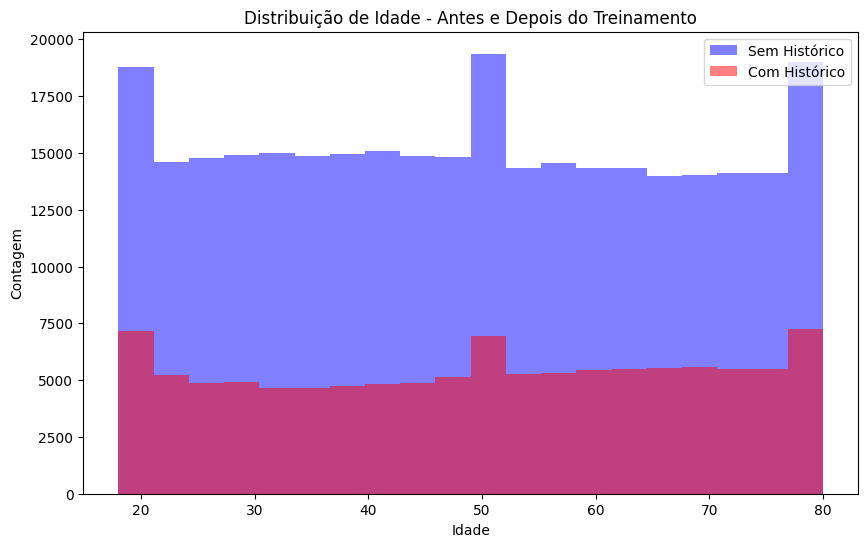

In [44]:

df['Predicted Mental Illness'] = model.predict(X)


plt.figure(figsize=(10, 6))
df[df['Predicted Mental Illness'] == 0]['Age'].plot(kind='hist', bins=20, alpha=0.5, label='Sem Histórico', color='blue')
df[df['Predicted Mental Illness'] == 1]['Age'].plot(kind='hist', bins=20, alpha=0.5, label='Com Histórico', color='red')
plt.title('Distribuição de Idade - Antes e Depois do Treinamento')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.legend()
plt.show()


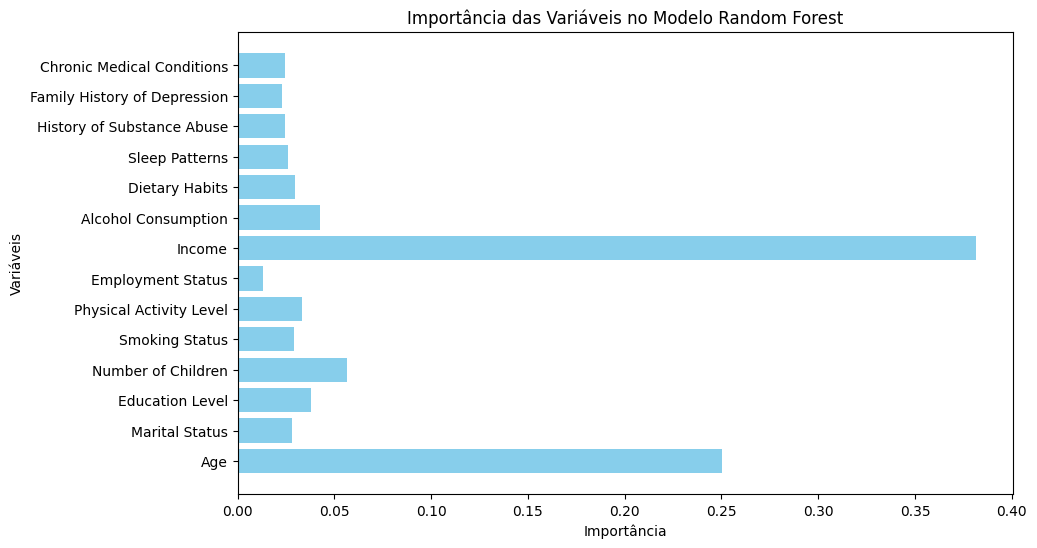

In [45]:

importances = model.feature_importances_
features = X.columns


plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.title('Importância das Variáveis no Modelo Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.show()


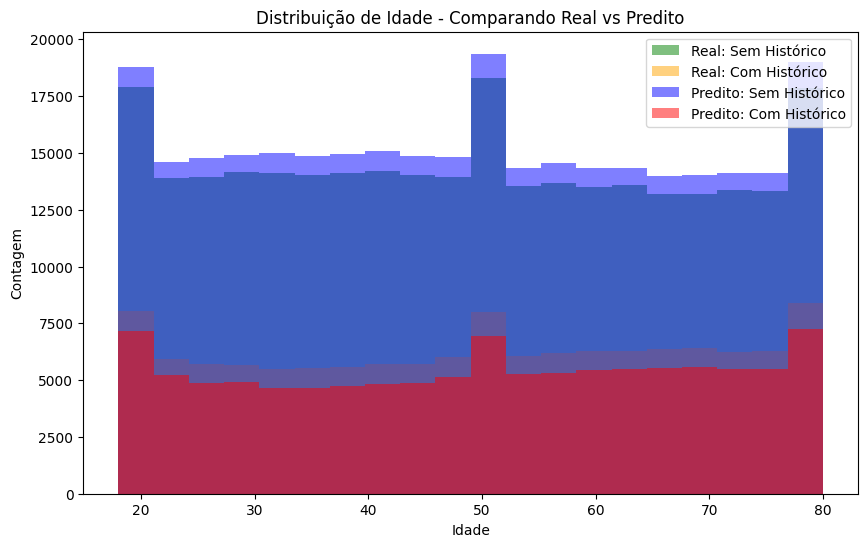

In [46]:

df['True Mental Illness'] = y
df['Predicted Mental Illness'] = model.predict(X)


plt.figure(figsize=(10, 6))
df[df['True Mental Illness'] == 0]['Age'].plot(kind='hist', bins=20, alpha=0.5, label='Real: Sem Histórico', color='green')
df[df['True Mental Illness'] == 1]['Age'].plot(kind='hist', bins=20, alpha=0.5, label='Real: Com Histórico', color='orange')
df[df['Predicted Mental Illness'] == 0]['Age'].plot(kind='hist', bins=20, alpha=0.5, label='Predito: Sem Histórico', color='blue')
df[df['Predicted Mental Illness'] == 1]['Age'].plot(kind='hist', bins=20, alpha=0.5, label='Predito: Com Histórico', color='red')
plt.title('Distribuição de Idade - Comparando Real vs Predito')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.legend()
plt.show()


**Número de filhos comparação**

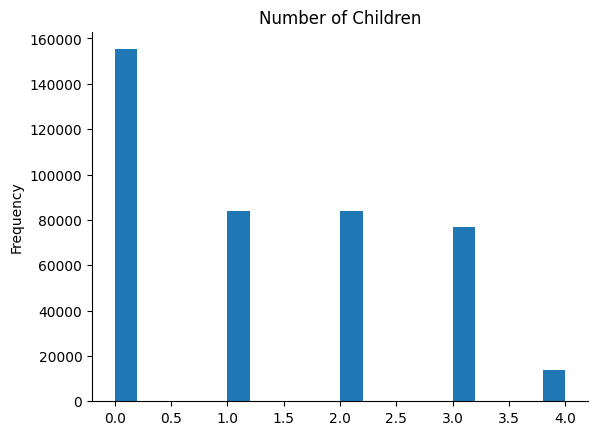

In [47]:
from matplotlib import pyplot as plt


df['Number of Children'].plot(kind='hist', bins=20, title='Number of Children')


plt.gca().spines[['top', 'right']].set_visible(False)


plt.show()


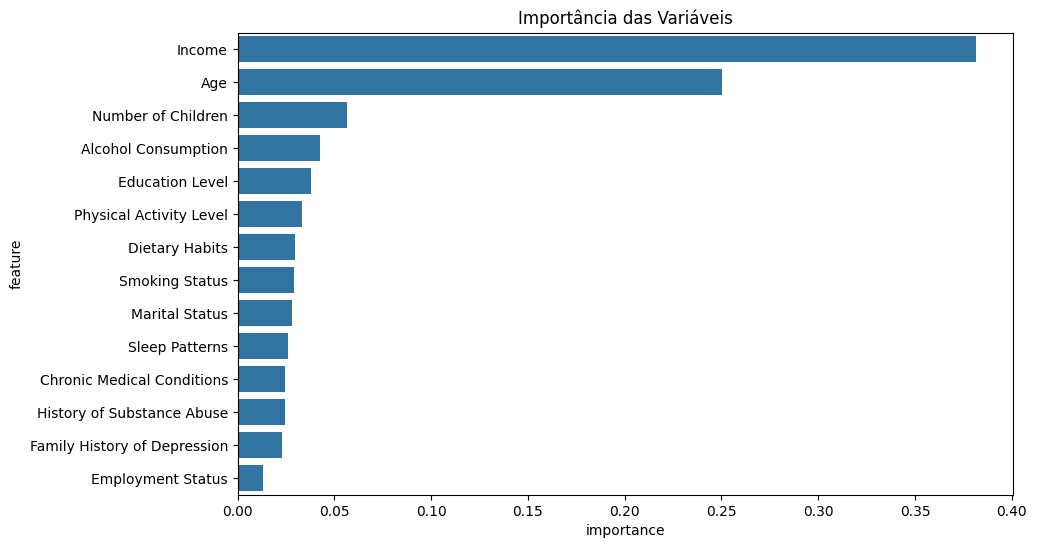

In [49]:
feature_importance = model.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
feature_df = feature_df.sort_values(by='importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_df)
plt.title('Importância das Variáveis')
plt.show()


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.91      0.79     57471
           1       0.36      0.12      0.18     25283

    accuracy                           0.67     82754
   macro avg       0.53      0.51      0.48     82754
weighted avg       0.60      0.67      0.60     82754



<Axes: >

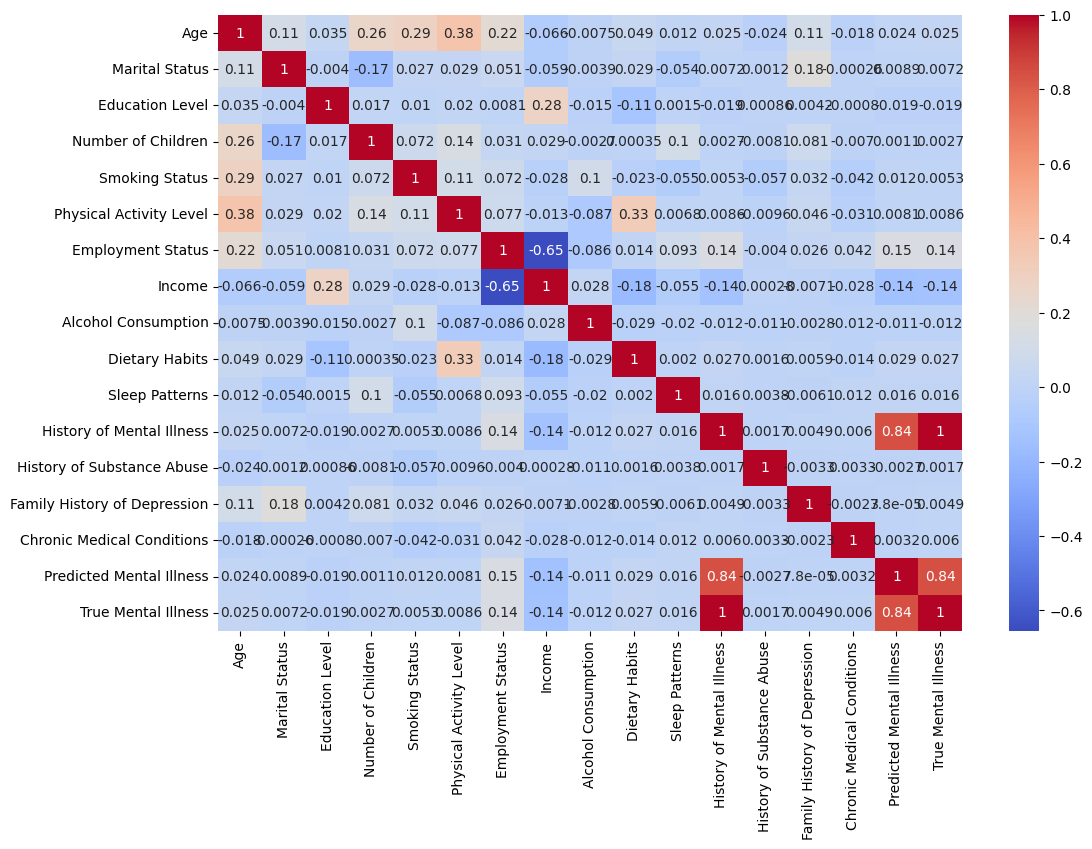

In [51]:
import seaborn as sns
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')



**Objetivo:** O gráfico acima é um mapa de calor (heatmap) que visualiza a matriz de correlação entre as variáveis numéricas no seu dataset.

**Como funciona:**

Matriz de Correlação: A função df.corr() calcula as correlações entre todas as variáveis numéricas no dataset. A correlação é uma medida estatística que expressa a intensidade e a direção da relação entre duas variáveis. Ela varia entre -1 e 1:
1 indica uma correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta).
-1 indica uma correlação negativa perfeita (quando uma variável aumenta, a outra diminui).
0 significa que não há correlação linear entre as variáveis.
Seaborn Heatmap: O sns.heatmap é usado para representar visualmente essa matriz. Ele colore as células de acordo com o valor da correlação, onde cores mais quentes (como o vermelho) indicam uma forte correlação positiva, e cores mais frias (como o azul) indicam uma forte correlação negativa.
O parâmetro annot=True exibe os valores numéricos dentro de cada célula.
O parâmetro cmap='coolwarm' escolhe o esquema de cores do mapa de calor, variando entre o vermelho e o azul.
O gráfico tem como objetivo ajudar a identificar rapidamente quais variáveis estão fortemente correlacionadas entre si, o que pode ser útil para entender as relações entre os dados.
**Exemplo de Interpretação:**

Se você tiver uma correlação alta entre variáveis como Income e Education Level, isso pode indicar que pessoas com maior nível educacional tendem a ter uma renda mais alta.
Variáveis que não apresentam correlação significativa com o alvo (no caso, History of Mental Illness) podem ser candidatas a exclusão ou requerem mais investigação.

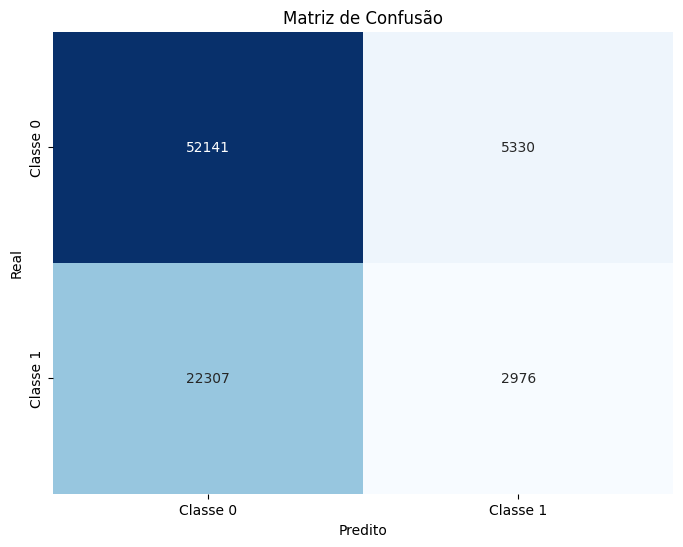

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matriz de Confusão')
plt.ylabel('Real')
plt.xlabel('Predito')
plt.show()


**Objetivo:** A matriz de confusão é uma ferramenta fundamental para avaliar a performance de um modelo de classificação. Ela compara as previsões do modelo com as verdadeiras classes (valores reais), permitindo entender como o modelo está se comportando.

**Como funciona:**

Matriz de Confusão: A função confusion_matrix(y_test, y_pred) cria uma matriz que mostra o número de vezes que o modelo classificou corretamente ou incorretamente as instâncias para cada classe. A matriz possui a seguinte estrutura:

Predito 0	Predito 1
Real 0	True Neg.	False Pos.
Real 1	False Neg.	True Pos.
True Positives (TP): O número de vezes que o modelo previu corretamente a classe 1.
True Negatives (TN): O número de vezes que o modelo previu corretamente a classe 0.
False Positives (FP): O número de vezes que o modelo previu erroneamente a classe 1 quando a classe verdadeira era 0.
False Negatives (FN): O número de vezes que o modelo previu erroneamente a classe 0 quando a classe verdadeira era 1.
Seaborn Heatmap: O sns.heatmap aqui é usado para visualizar a matriz de confusão. As cores variam de acordo com o número de classificações, e os valores numéricos são anotados na célula para facilitar a leitura.

O parâmetro fmt='d' assegura que os valores numéricos sejam apresentados como números inteiros.
xticklabels e yticklabels definem os rótulos das classes (0 e 1) no eixo x e y, respectivamente.
O parâmetro cmap='Blues' escolhe a cor para o mapa de calor, onde cores mais escuras indicam um valor mais alto.
Exemplo de Interpretação:

Se o modelo tem muitos False Positives (FP), isso significa que ele está prevendo a classe 1 (por exemplo, "possui doença mental") em muitos casos em que a classe verdadeira é 0 (não possui doença mental). Isso pode indicar que o modelo está sendo excessivamente otimista.
Se houver False Negatives (FN), isso indica que o modelo está deixando de identificar algumas instâncias positivas (a pessoa que realmente tem a doença mental, mas o modelo classificou como negativo). Isso pode ser um problema importante, especialmente em diagnósticos médicos.
True Positives e True Negatives mostram a eficácia do modelo em identificar corretamente as classes.

In [53]:

for col in X_train.columns:
    print(f"Valores únicos na coluna {col}:")
    print(X_train[col].unique())
    print("-" * 50)



Valores únicos na coluna Age:
[57 20 52 68 78 76 41 73 45 53 28 63 22 30 60 35 72 49 21 66 48 19 23 51
 29 64 65 56 18 26 58 54 50 47 61 69 74 39 24 27 75 43 36 25 40 32 46 67
 44 79 70 37 42 34 33 80 31 38 59 62 55 77 71]
--------------------------------------------------
Valores únicos na coluna Marital Status:
[0 2 1 3]
--------------------------------------------------
Valores únicos na coluna Education Level:
[2 0 1 3 4]
--------------------------------------------------
Valores únicos na coluna Number of Children:
[0 1 3 2 4]
--------------------------------------------------
Valores únicos na coluna Smoking Status:
[2 0 1]
--------------------------------------------------
Valores únicos na coluna Physical Activity Level:
[1 2 0]
--------------------------------------------------
Valores únicos na coluna Employment Status:
[0 1]
--------------------------------------------------
Valores únicos na coluna Income:
[27058.5   4655.7  29287.41 ...  8909.63 28506.43 78142.27]
--------

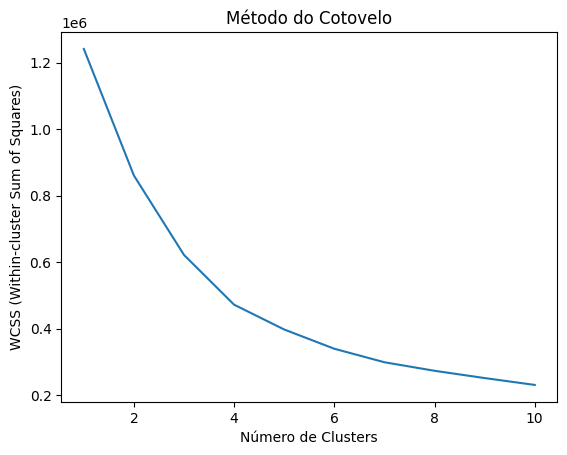

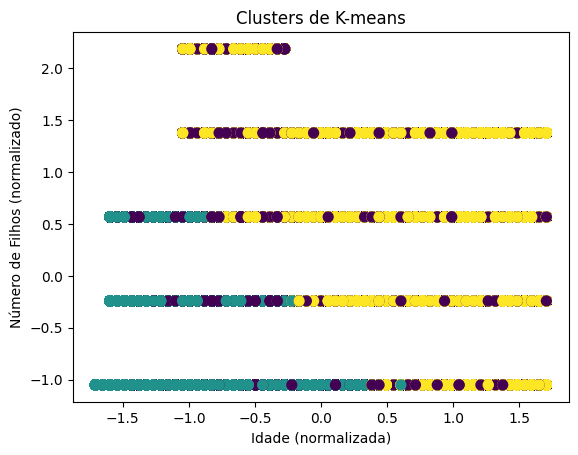

In [54]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


numeric_columns = ['Age', 'Number of Children', 'Income']
X_clustering = df[numeric_columns]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()


kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


df['Cluster'] = y_kmeans


plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title('Clusters de K-means')
plt.xlabel('Idade (normalizada)')
plt.ylabel('Número de Filhos (normalizado)')
plt.show()


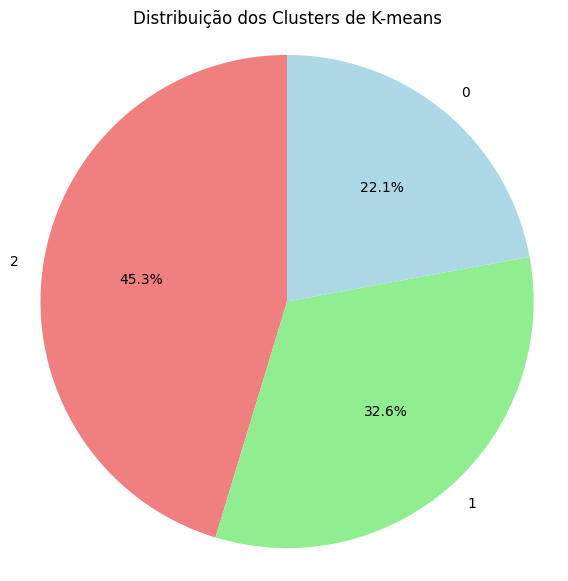

In [55]:
import matplotlib.pyplot as plt


cluster_counts = df['Cluster'].value_counts()


plt.figure(figsize=(7, 7))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightblue'], startangle=90)
plt.title('Distribuição dos Clusters de K-means')
plt.axis('equal')
plt.show()


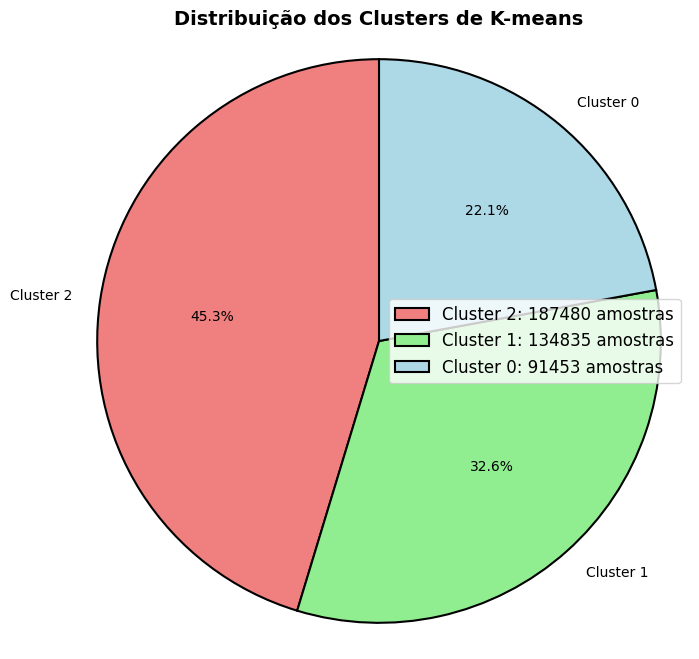

In [56]:
import matplotlib.pyplot as plt


cluster_counts = df['Cluster'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(cluster_counts,
        labels=[f'Cluster {i}' for i in cluster_counts.index],
        autopct='%1.1f%%',
        colors=['lightcoral', 'lightgreen', 'lightblue'],
        startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid'})


plt.title('Distribuição dos Clusters de K-means', fontsize=14, weight='bold')
plt.axis('equal')


plt.legend(
    labels=[f'Cluster {i}: {count} amostras' for i, count in zip(cluster_counts.index, cluster_counts)],
    loc="best",
    fontsize=12
)


plt.show()


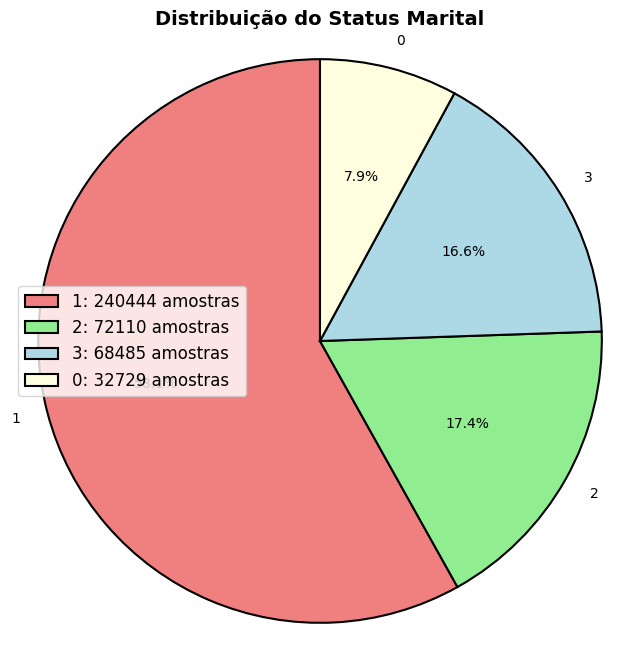

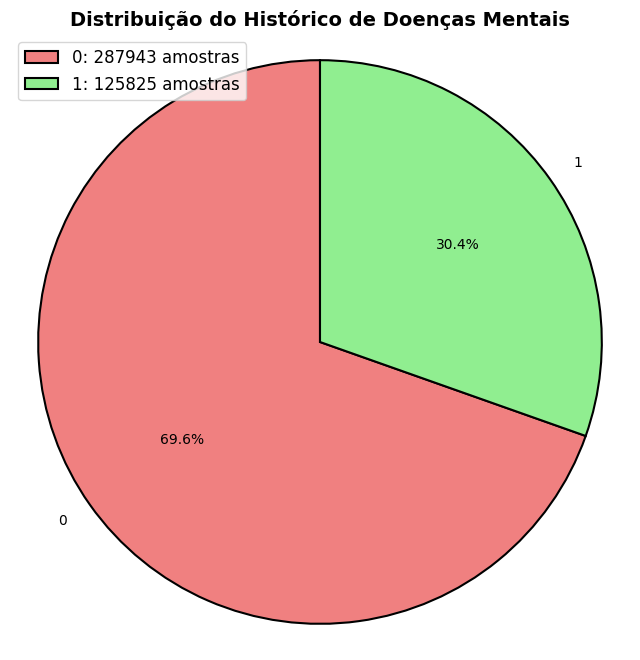

In [57]:
import matplotlib.pyplot as plt

def plot_pie_chart(column, title):

    value_counts = df[column].value_counts()


    plt.figure(figsize=(8, 8))
    plt.pie(value_counts,
            labels=value_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=['lightcoral', 'lightgreen', 'lightblue', 'lightyellow', 'lightpink'],
            wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid'})


    plt.title(title, fontsize=14, weight='bold')
    plt.axis('equal')


    plt.legend(
        labels=[f'{label}: {count} amostras' for label, count in zip(value_counts.index, value_counts)],
        loc="best",
        fontsize=12
    )


    plt.show()


plot_pie_chart('Marital Status', 'Distribuição do Status Marital')


plot_pie_chart('History of Mental Illness', 'Distribuição do Histórico de Doenças Mentais')


In [76]:

X_test_clean = X_test[y_test.notna()]
y_test_clean = y_test.dropna()


print(f"Nova forma de X_test: {X_test_clean.shape}")
print(f"Nova forma de y_test: {y_test_clean.shape}")

print(f"Valores ausentes em y_test antes da remoção: {y_test.isnull().sum()}")

print(f"Valores ausentes em y_test: {y_test.isnull().sum()}")
print(f"Distribuição dos valores em y_test:\n{y_test.value_counts(dropna=False)}")

X_test_clean = X_test[y_test.notna()]
y_test_clean = y_test.dropna()


print(f"Forma de X_test_clean: {X_test_clean.shape}")
print(f"Forma de y_test_clean: {y_test_clean.shape}")

df['History of Mental Illness'] = df['History of Mental Illness'].fillna(df['History of Mental Illness'].mode()[0])


X = df.drop('History of Mental Illness', axis=1)
y = df['History of Mental Illness']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Valores ausentes em y_test após o preenchimento: {y_test.isnull().sum()}")


print(f"Valores ausentes em X_test: {X_test.isnull().sum()}")
print(f"Valores ausentes em y_test: {y_test.isnull().sum()}")
print(f"Distribuição de y_test: {y_test.value_counts(dropna=False)}")


Nova forma de X_test: (0, 17)
Nova forma de y_test: (0,)
Valores ausentes em y_test antes da remoção: 82754
Valores ausentes em y_test: 82754
Distribuição dos valores em y_test:
History of Mental Illness
NaN    82754
Name: count, dtype: int64
Forma de X_test_clean: (0, 17)
Forma de y_test_clean: (0,)
Valores ausentes em y_test após o preenchimento: 0
Valores ausentes em X_test: Age                                 0
Marital Status                  82754
Education Level                 82754
Number of Children                  0
Smoking Status                      0
Physical Activity Level         82754
Employment Status               82754
Income                              0
Alcohol Consumption                 0
Dietary Habits                      0
Sleep Patterns                      0
History of Substance Abuse          0
Family History of Depression        0
Chronic Medical Conditions          0
Predicted Mental Illness            0
True Mental Illness                 0
Cluster    

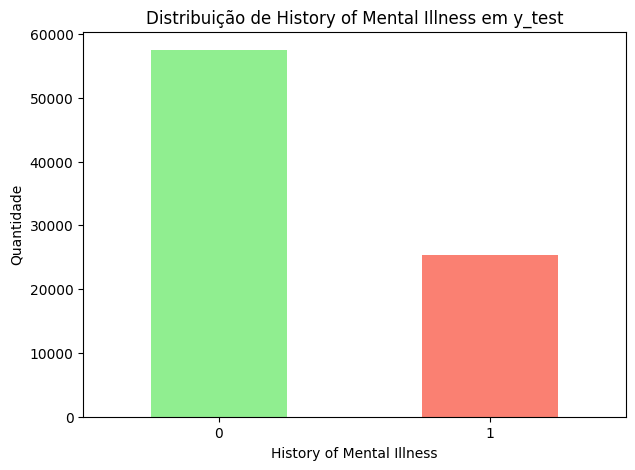

In [77]:
import matplotlib.pyplot as plt


y_test_distribution = y_test.value_counts()


plt.figure(figsize=(7, 5))
y_test_distribution.plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title('Distribuição de History of Mental Illness em y_test')
plt.xlabel('History of Mental Illness')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4728/4728 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7007 - loss: 0.5965 - val_accuracy: 0.7016 - val_loss: 0.5935
Epoch 2/5
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7020 - loss: 0.5918 - val_accuracy: 0.7016 - val_loss: 0.5935
Epoch 3/5
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7004 - loss: 0.5933 - val_accuracy: 0.7016 - val_loss: 0.5934
Epoch 4/5
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6992 - loss: 0.5937 - val_accuracy: 0.7016 - val_loss: 0.5928
Epoch 5/5
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7022 - loss: 0.5914 - val_accuracy: 0.7016 - val_loss: 0.5926


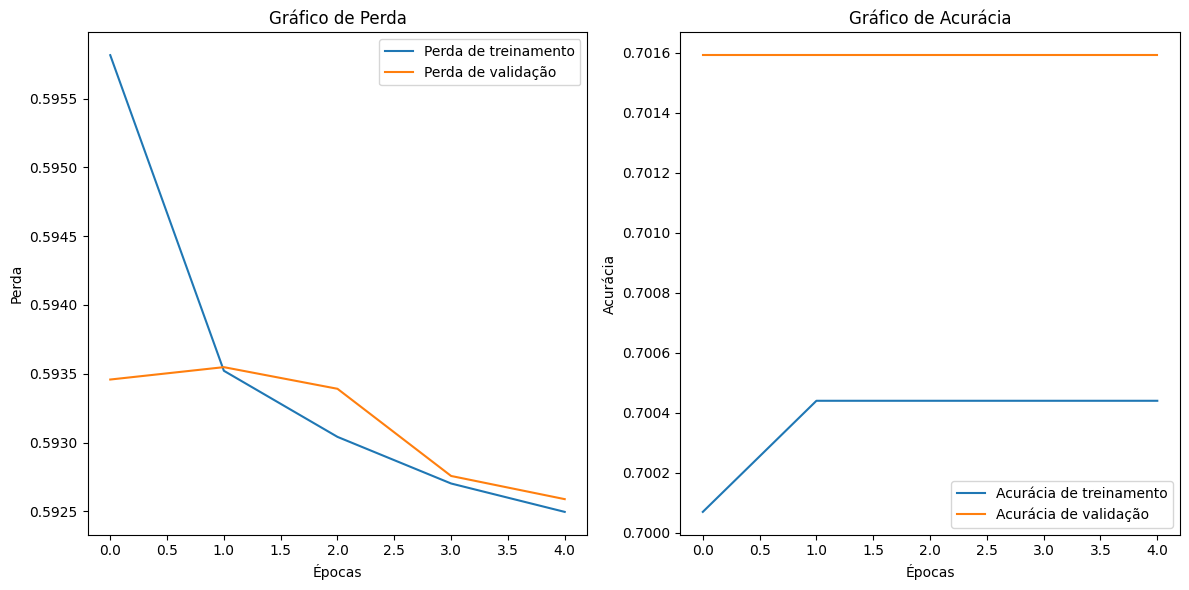

1182/1182 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     26537
           1       0.00      0.00      0.00     11287

    accuracy                           0.70     37824
   macro avg       0.35      0.50      0.41     37824
weighted avg       0.49      0.70      0.58     37824

Acurácia final do modelo: 0.7015915820642978


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


file_path = '/content/depression_data.csv'
df = pd.read_csv(file_path)


df = df.drop('Name', axis=1)


df['Marital Status'] = df['Marital Status'].map({'Single': 0, 'Married': 1, 'Divorced': 2, 'Widowed': 3})
df['Education Level'] = df['Education Level'].map({'High School': 0, 'Bachelor\'s Degree': 1, 'Master\'s Degree': 2})
df['Smoking Status'] = df['Smoking Status'].map({'Non-smoker': 0, 'Smoker': 1})
df['Physical Activity Level'] = df['Physical Activity Level'].map({'Sedentary': 0, 'Moderate': 1, 'Active': 2})
df['Employment Status'] = df['Employment Status'].map({'Unemployed': 0, 'Employed': 1})


df['History of Mental Illness'] = df['History of Mental Illness'].map({'No': 0, 'Yes': 1})
df['History of Substance Abuse'] = df['History of Substance Abuse'].map({'No': 0, 'Yes': 1})
df['Family History of Depression'] = df['Family History of Depression'].map({'No': 0, 'Yes': 1})
df['Chronic Medical Conditions'] = df['Chronic Medical Conditions'].map({'No': 0, 'Yes': 1})


df['Alcohol Consumption'] = df['Alcohol Consumption'].map({'Low': 0, 'Moderate': 1, 'High': 2})
df['Dietary Habits'] = df['Dietary Habits'].map({'Unhealthy': 0, 'Moderate': 1, 'Healthy': 2})
df['Sleep Patterns'] = df['Sleep Patterns'].map({'Poor': 0, 'Fair': 1, 'Good': 2})


df = df.dropna()


X = df.drop('History of Mental Illness', axis=1)
y = df['History of Mental Illness']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_data=(X_test_scaled, y_test))


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perda de treinamento')
plt.plot(history.history['val_loss'], label='Perda de validação')
plt.title('Gráfico de Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Acurácia de treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de validação')
plt.title('Gráfico de Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()


plt.tight_layout()
plt.show()


y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5)

from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))
print(f"Acurácia final do modelo: {accuracy_score(y_test, y_pred)}")




xplicação detalhada do código:
Carregamento e Pré-processamento de Dados:

Leitura do arquivo CSV: O código começa carregando o dataset utilizando pandas.read_csv(). Isso traz o arquivo para um formato de dataframe, onde as colunas são automaticamente reconhecidas.

Remoção da coluna 'Name': Como a coluna Name contém apenas dados textuais (nomes), ela não possui utilidade para o treinamento do modelo, por isso é removida usando df.drop('Name', axis=1).

Transformação de Colunas Categóricas:

Mapeamento de variáveis categóricas: Algumas colunas do dataset contêm categorias textuais, como "Sim" e "Não", ou "Alto", "Moderado", "Baixo". O código mapeia esses valores para valores numéricos para tornar as variáveis compreensíveis para o modelo de aprendizado de máquina. Por exemplo:
"Sim" e "Não" são mapeados para 1 e 0, respectivamente.
"Alto", "Moderado" e "Baixo" são mapeados para 2, 1, e 0.
Tratamento de variáveis numéricas: Algumas colunas, como o estado civil, nível de educação, entre outras, são mapeadas para valores numéricos. Por exemplo:
"Married" é mapeado para 1, "Single" para 0, etc.
Remoção de Valores Ausentes:

Eliminação de linhas com NaN (valores ausentes): A linha df = df.dropna() remove qualquer linha que contenha valores ausentes em qualquer coluna. Isso é feito para garantir que não haja problemas no treinamento do modelo, pois valores ausentes podem atrapalhar a performance do modelo de aprendizado de máquina.
Divisão dos Dados em Conjunto de Treinamento e Teste:

Separação das variáveis dependentes e independentes:
X contém todas as variáveis independentes (as características, como "Idade", "Estado Civil", etc.).
y contém a variável dependente (a variável alvo que estamos tentando prever, que neste caso é History of Mental Illness).
Divisão em treinamento e teste: A função train_test_split() divide os dados em dois subconjuntos:
Treinamento: 80% dos dados são usados para treinar o modelo.
Teste: 20% dos dados são reservados para testar o modelo e avaliar seu desempenho após o treinamento.
Escalonamento dos Dados (Padronização):

Uso de StandardScaler: Antes de alimentar os dados no modelo, eles são escalonados usando o StandardScaler para garantir que todas as variáveis tenham a mesma escala. Isso ajuda a melhorar a performance de alguns algoritmos de aprendizado de máquina, como redes neurais.
O fit_transform() é usado no conjunto de treinamento para calcular a média e o desvio padrão, aplicando a transformação.
O transform() é usado no conjunto de teste, usando as estatísticas calculadas a partir do conjunto de treinamento.
Construção e Treinamento do Modelo de Rede Neural:

Modelo Sequential: Um modelo de rede neural simples é construído utilizando o Keras (tensorflow.keras). O modelo tem três camadas:
Camada de entrada (com 64 neurônios): Define o número de entradas do modelo, que é o número de variáveis em X_train.
Camada oculta (com 32 neurônios): Aplica uma ativação ReLU para ajudar o modelo a aprender padrões mais complexos.
Camada de saída (com 1 neurônio): A saída do modelo é uma única unidade com a ativação sigmoide, que é usada para classificação binária (0 ou 1, no caso de "sim" ou "não" para a doença mental).
Compilação do modelo: O modelo é compilado com o otimizador adam, que é bastante eficiente, e a função de perda binary_crossentropy, que é apropriada para problemas de classificação binária.
Treinamento do Modelo:

model.fit(): O modelo é treinado usando os dados de treinamento (X_train_scaled, y_train). A função fit() também recebe os dados de validação (X_test_scaled, y_test), o que permite acompanhar a performance do modelo durante o treinamento, utilizando a validação no conjunto de teste.

Exibição do histórico do treinamento: A função retorna um histórico com os valores de perda (loss) e acurácia (accuracy) ao longo de cada época (epoch). Esses valores são úteis para monitorar o progresso do treinamento e detectar overfitting ou underfitting.

Visualização de Acurácia e Perda:

Gráficos de Acurácia e Perda: São gerados dois gráficos:
O primeiro mostra a perda do modelo ao longo do treinamento e da validação, permitindo visualizar como o modelo está se ajustando.
O segundo mostra a acurácia do modelo, tanto para o conjunto de treinamento quanto para o conjunto de validação.
Exibição no console: No código, plt.show() exibe esses gráficos visualmente.
Avaliação do Modelo:

Predição nos dados de teste: O modelo faz previsões nos dados de teste, e as probabilidades previstas são convertidas para 0 ou 1, utilizando um limiar de 0.5.

Relatório de classificação: Utilizando classification_report() do sklearn, são geradas métricas de avaliação do modelo, como precisão (precision), recall e f1-score, para verificar a qualidade da classificação.

Acurácia final: A função accuracy_score() é utilizada para calcular a acurácia do modelo, ou seja, a proporção de previsões corretas feitas pelo modelo.

Objetivo de cada parte do código:
Pré-processamento: Preparar os dados para o modelo de aprendizado de máquina, convertendo variáveis categóricas em valores numéricos e tratando valores ausentes.

Divisão de dados: Separar os dados em conjuntos de treinamento e teste para treinar o modelo e avaliar sua performance em dados não vistos.

Escalonamento: Garantir que todas as variáveis tenham a mesma escala, o que ajuda no desempenho do modelo, especialmente redes neurais.

Modelo de rede neural: Construir e treinar uma rede neural para prever a probabilidade de uma pessoa ter ou não uma doença mental com base nas variáveis fornecidas.

Avaliação do modelo: Medir a eficácia do modelo utilizando métricas de avaliação, como acurácia e os gráficos de perda/acurácia, e gerar o relatório de classificação para ver como ele está se comportando nas predições.

*Código com error*


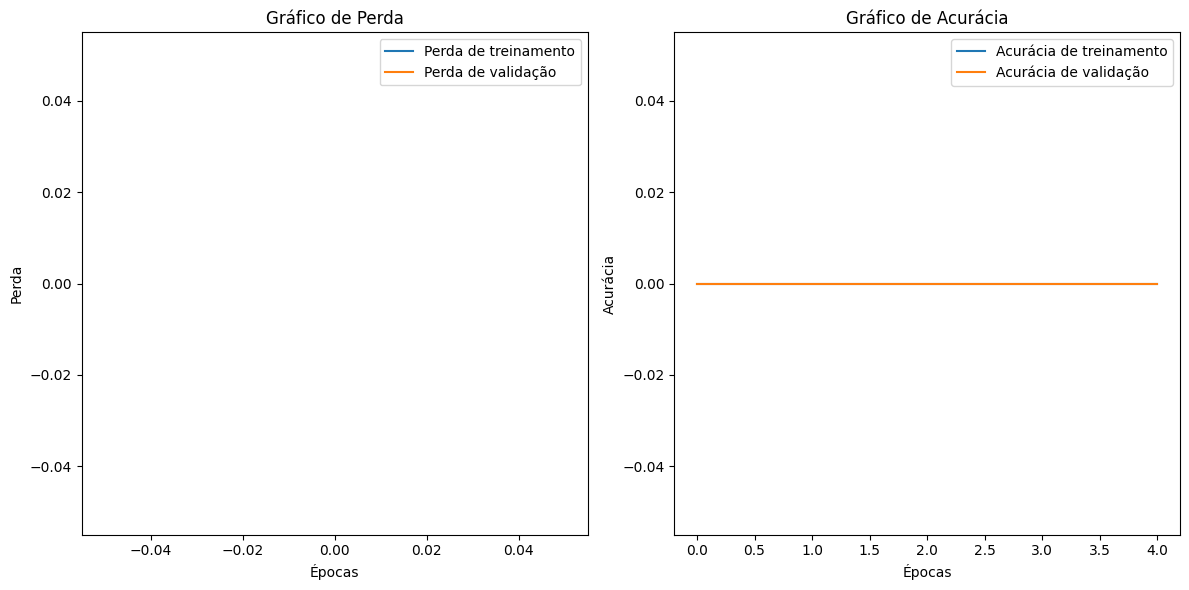

In [95]:
import matplotlib.pyplot as plt

# Gráfico de Perda (Loss)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perda de treinamento')
plt.plot(history.history['val_loss'], label='Perda de validação')
plt.title('Gráfico de Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Gráfico de Acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Acurácia de treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de validação')
plt.title('Gráfico de Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Exibir os gráficos
plt.tight_layout()
plt.show()


O gráfico mostra como a acurácia do modelo e a perda evoluem ao longo do tempo durante o treinamento, o que ajuda a entender o aprendizado do modelo.
Utilizamos uma rede neural para prever o histórico de doenças mentais com base em variáveis como idade, nível de atividade física, status de fumante, entre outros.
O modelo foi treinado por 5 épocas (iterações) e as métricas de acurácia e perda foram monitoradas durante o processo.

**Acurácia:**
Acurácia crescente nas épocas indica que o modelo está aprendendo bem.
Se houver overfitting (quando a acurácia de treinamento aumenta, mas a acurácia de validação não), isso pode indicar que o modelo está "decorando" os dados e não generalizando bem.

**Perda:**
Perda decrescente indica que o modelo está ajustando suas previsões e ficando mais preciso.
Se a perda não diminuir, o modelo não está aprendendo adequadamente e talvez precise de mais épocas ou ajustes no modelo.

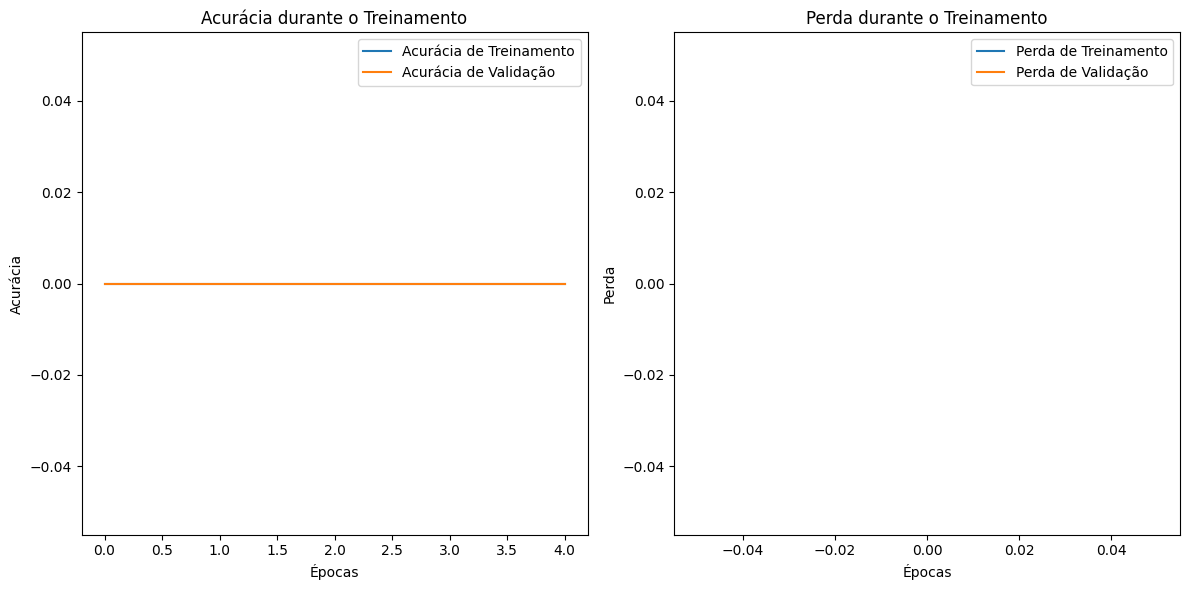

In [79]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Acurácia durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.title('Perda durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/5
10345/10345 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/5
10345/10345 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/5
10345/10345 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/5
10345/10345 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/5
10345/10345 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan


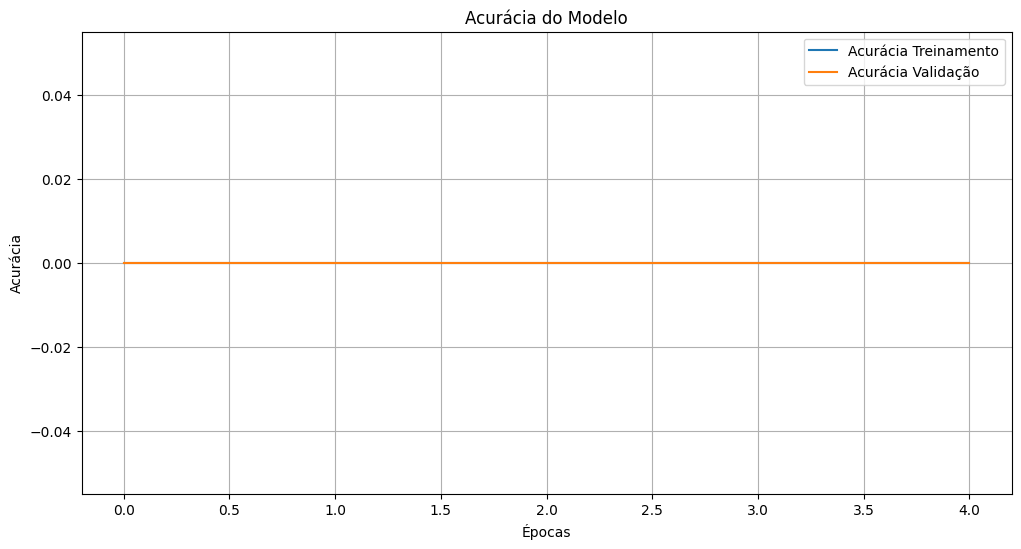

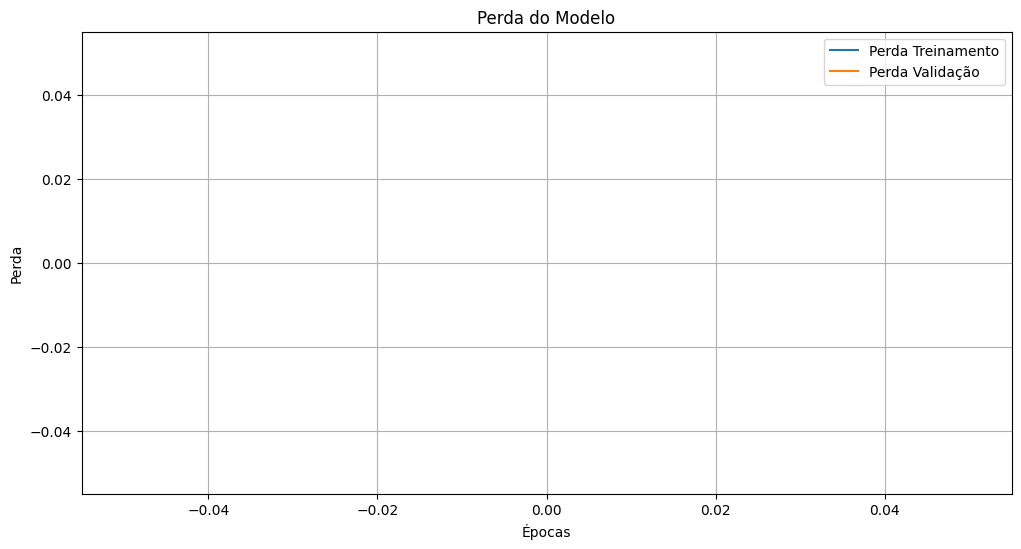

In [81]:
import matplotlib.pyplot as plt

# Histórico de treinamento
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Gráfico de Acurácia
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Acurácia Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de Perda
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Perda Treinamento')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.title('Perda do Modelo')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)
plt.show()


In [84]:
# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Imprimir a perda (loss) após cada época
for epoch, loss in enumerate(history.history['loss']):
    print(f"Perda após época {epoch+1}: {loss}")


Epoch 1/5
10345/10345 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/5
10345/10345 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/5
10345/10345 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/5
10345/10345 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/5
10345/10345 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Perda após época 1: nan
Perda após época 2: nan
Perda após época 3: nan
Perda após época 4: nan
Perda após época 5: nan


In [88]:
print(X_train.isnull().sum())  # Verifique por valores faltantes
print(X_train.describe())  # Verifique se há valores extremos




Age                                  0
Marital Status                  331014
Education Level                 331014
Number of Children                   0
Smoking Status                  331014
Physical Activity Level         331014
Employment Status               331014
Income                               0
Alcohol Consumption                  0
Dietary Habits                       0
Sleep Patterns                       0
History of Substance Abuse           0
Family History of Depression         0
Chronic Medical Conditions           0
Predicted Mental Illness             0
True Mental Illness                  0
Cluster                              0
dtype: int64
                 Age  Marital Status  Education Level  Number of Children  \
count  331014.000000             0.0              0.0       331014.000000   
mean       48.980714             NaN              NaN            1.299903   
std        18.150317             NaN              NaN            1.237647   
min        18.00

In [89]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())


In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [91]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [92]:
model = Sequential([
    Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
print(X_train.isnull().sum())  # Verifique valores ausentes
print(X_train.describe())  # Verifique valores extremos


Age                                  0
Marital Status                  331014
Education Level                 331014
Number of Children                   0
Smoking Status                  331014
Physical Activity Level         331014
Employment Status               331014
Income                               0
Alcohol Consumption                  0
Dietary Habits                       0
Sleep Patterns                       0
History of Substance Abuse           0
Family History of Depression         0
Chronic Medical Conditions           0
Predicted Mental Illness             0
True Mental Illness                  0
Cluster                              0
dtype: int64
                 Age  Marital Status  Education Level  Number of Children  \
count  331014.000000             0.0              0.0       331014.000000   
mean       48.980714             NaN              NaN            1.299903   
std        18.150317             NaN              NaN            1.237647   
min        18.00

<ipython-input-80-32b8c762ce9f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y=missing_data.values, palette='viridis')


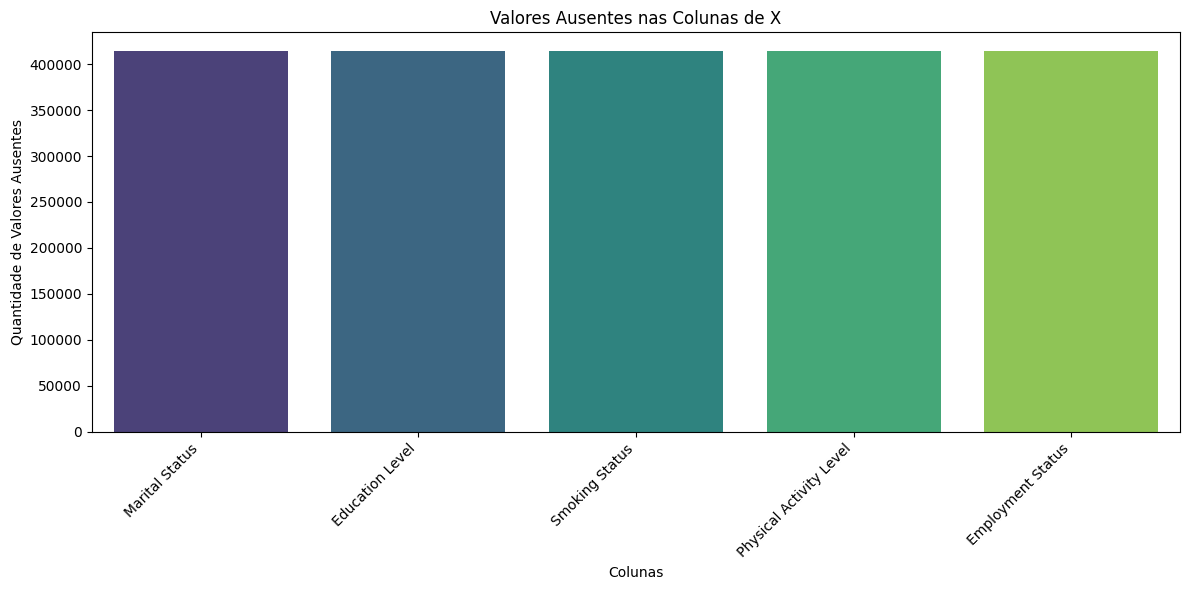

<ipython-input-80-32b8c762ce9f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='Set2')
<ipython-input-80-32b8c762ce9f>:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(x=y_test, palette='Set2')


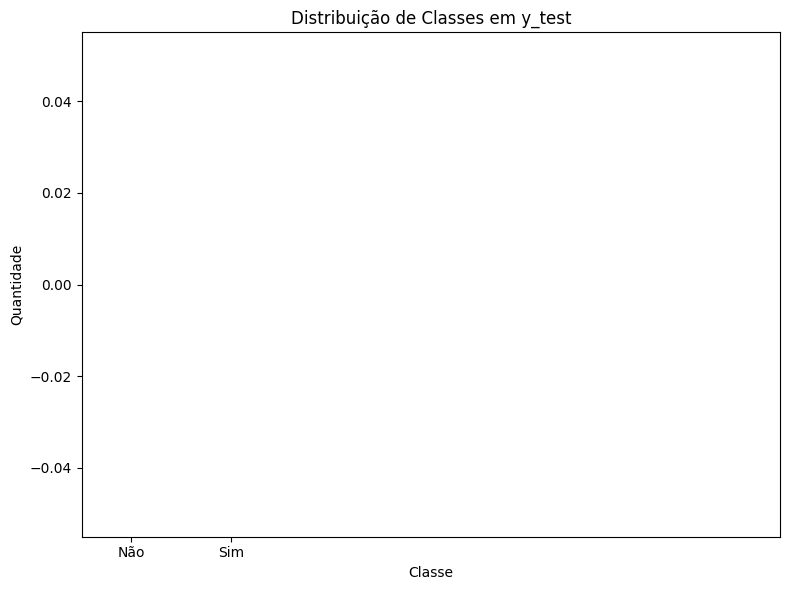

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
missing_data = X.isnull().sum()
missing_data = missing_data[missing_data > 0]
sns.barplot(x=missing_data.index, y=missing_data.values, palette='viridis')
plt.title('Valores Ausentes nas Colunas de X')
plt.xlabel('Colunas')
plt.ylabel('Quantidade de Valores Ausentes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x=y_test, palette='Set2')
plt.title('Distribuição de Classes em y_test')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()


In [61]:
import matplotlib.pyplot as plt


class_counts = y_train.value_counts()


print("Contagem das classes em y_train:")
print(class_counts)


if class_counts.shape[0] > 1:
    plt.figure(figsize=(7, 7))
    plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], startangle=90)
    plt.title('Distribuição de Histórico de Doenças Mentais')
    plt.axis('equal')
    plt.show()
else:
    print("Não há dados suficientes para gerar o gráfico de pizza.")




Contagem das classes em y_train:
Series([], Name: count, dtype: int64)
Não há dados suficientes para gerar o gráfico de pizza.


In [74]:
import pandas as pd




print(df['Smoking Status'].dtype)


print(df['Smoking Status'].apply(lambda x: isinstance(x, int)).all())


print(df['Smoking Status'].unique())


print(df['Smoking Status'].value_counts())




object
False
['Desconhecido']
Smoking Status
Desconhecido    413768
Name: count, dtype: int64


Coluna 'Smoking Status' encontrada!
Contagem dos valores de 'Smoking Status':
Smoking Status
Desconhecido    413768
Name: count, dtype: int64


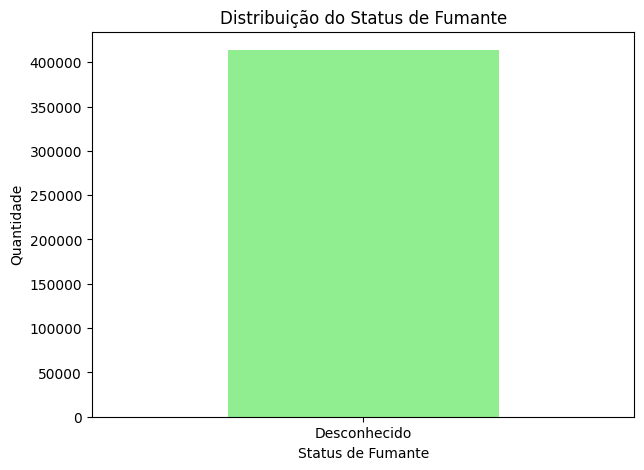

In [73]:
import matplotlib.pyplot as plt

# Verificando se a coluna 'Smoking Status' existe no DataFrame
if 'Smoking Status' in df.columns:
    print("Coluna 'Smoking Status' encontrada!")

    # Verificando se a coluna contém dados
    smoking_status_counts = df['Smoking Status'].value_counts()
    print("Contagem dos valores de 'Smoking Status':")
    print(smoking_status_counts)

    # Gerando o gráfico apenas se houver dados
    if not smoking_status_counts.empty:
        plt.figure(figsize=(7, 5))
        smoking_status_counts.plot(kind='bar', color=['lightgreen'])
        plt.title('Distribuição do Status de Fumante')
        plt.xlabel('Status de Fumante')
        plt.ylabel('Quantidade')
        plt.xticks(rotation=0)
        plt.show()
    else:
        print("Não há dados suficientes para plotar o gráfico.")
else:
    print("Coluna 'Smoking Status' não encontrada no DataFrame.")



In [82]:
import pandas as pd


df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6]
})

df_clustered = df.copy()

df_clustered['A'] = df_clustered['A'] * 2

print("DataFrame Original:")
print(df)

print("\nDataFrame Modificado (df_clustered):")
print(df_clustered)



DataFrame Original:
   A  B
0  1  4
1  2  5
2  3  6

DataFrame Modificado (df_clustered):
   A  B
0  2  4
1  4  5
2  6  6
